# Lab 8: Define and Solve an ML Problem of Your Choosing

In [13]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [14]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

**1. Dataset selected:** 
We are going to use the Airbnb NYC listings dataset (`airbnbListingsData.csv`) which includes listing features like location, type of room, reviews, and price.

**2. What will you be predicting? What is the label?** 
We will be predicting the **price** of an Airbnb listing. The **label** (target variable) is the `price` feature. 

**3. Is this a supervised or unsupervised learning problem? What type?** 
This is a **supervised learning** problem because we are training our model on labeled data, which has known outputs (prices). 
This is a **regression problem** because the target variable is a continuous numerical value. 

**4. What are your features?** 
The features we will use include: 
- `accommodates`
- `bathrooms`
- `bedrooms`
- `beds`
- `number_of_reviews`
- `review_scores_rating`
- `amenities` (a count of amenities, converted to a numerical count)
- One-hot encoded flags for the categories of `room_type`
- One-hot encoded flags for the categories of `neighbourhood_group_cleansed`

**5. Why is this a significant problem?** 
If hosts can accurately predict their price, they can ensure they have a comparable price with other listings, regardless of where they are located within the host or prospective guests (finding a place to stay and capture stories). Most individuals will pay market value for an Airbnb listing, however, when hosts are able to capture a higher value (most revenue) with their listing, it is satisfying. In these cases, the guests have comparative pricing (even iffully not knowing prices but generally knowing what luxury and economic choices look like). The same satisfaction can be held by guests finding fair and equitable prices generally. A pricing prediction solution can provide benefit through homogenizing pricing suggestions, overall user satisfaction, and the trust users have for the system through the equitable pricing standard and outlining across all listings.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [15]:
# The code for which this is implemented and excuted is in Part 5. Please refer to Part 5 to see how Part 3 is accomplished. Thank you :)

### Exploratory Data Analysis (EDA)

# To better understand the structure and quality of the Airbnb dataset, we performed extensive exploratory data analysis using Pandas, Matplotlib, and Seaborn.

#### Data Inspection Techniques Used
'''
- **`df.info()`** — Identified data types and missing values.
- **`df.describe()`** — Assessed central tendency, spread, and potential outliers.
- **`df.isnull().sum()`** — Quantified missingness.
- **Seaborn `pairplot` and `heatmap`** — Explored feature correlations and visualized clusters or anomalies.
- **`value_counts()` on categorical features** — Checked distribution of categories, especially for `room_type` and `neighbourhood_group_cleansed`.

'''


### Data Preparation Techniques Applied
'''
We applied the following data preparation steps:

- **Handling Missing Values**:
  - Filled missing values in `bedrooms` and `beds` with their **median**.
  - Created binary indicator columns `bedrooms_is_null` and `beds_is_null` to retain information about missingness.

- **Feature Selection**:
  - Retained numerical features with predictive potential: `accommodates`, `bathrooms`, `bedrooms`, `beds`.
  - Removed high-cardinality and irrelevant features such as `name`, `host_name`, and `description`.

- **Categorical Encoding**:
  - Used **One-Hot Encoding** on `room_type` and `neighbourhood_group_cleansed`.
  - Reduced cardinality in `neighbourhood_group_cleansed` by grouping rare values into "Other".

- **Outlier Handling**:
  - Outliers were initially observed via boxplots and `describe()`, but not explicitly removed for baseline comparison.
  - Future improvement could include log transformation or capping extreme values of `price`.

- **Feature Type Enforcement**:
  - Ensured all model features are of numeric type via `select_dtypes`.


'''

### Suitable Machine Learning Models
'''

Given the regression nature of our target variable (`price`), we explored and tested the following models:

- **Linear Regression**: As a simple baseline model.
- **MLP Regressor**: To capture nonlinear patterns.
- **Random Forest Regressor**: For better handling of nonlinear and high-dimensional data.
- **Gradient Boosting Regressor**: For fine-grained predictions using boosting.
- **K-Means Clustering**: Used in parallel to discover natural groupings for EDA purposes.
- **GridSearchCV**: Used to tune hyperparameters across various models.

### Evaluation Metrics & Methods

- **Primary Evaluation Metrics**:
  - Mean Squared Error (**MSE**)
  - R-squared (**R²**)

These metrics provide a good balance of **penalizing large errors (via MSE)** and **explaining variance (via R²)**.

- **Performance Validation**:
  - Models were trained and evaluated using a **train-test split** (75% training, 25% testing).
  - Cross-validation via `GridSearchCV` helped identify optimal hyperparameters and avoid overfitting.

### Additional Data Prep for Model Balance

- **Feature Scaling**:
  - Scaling was necessary for the **MLP Regressor** to ensure stable and fast convergence during gradient-based training.

- **Class Balance**:
  - Not applicable here, since this is a **regression** problem, not classification.

'''

### Summary of Findings

'''
- The dataset required significant preprocessing due to missingness and high-cardinality categorical columns.
- One-hot encoding and scaling played a critical role in model performance.
- Ensemble models (e.g., Random Forest and Gradient Boosting) outperformed linear regression.
- Hyperparameter tuning and clustering helped enhance both model quality and dataset understanding.
'''

'\n- The dataset required significant preprocessing due to missingness and high-cardinality categorical columns.\n- One-hot encoding and scaling played a critical role in model performance.\n- Ensemble models (e.g., Random Forest and Gradient Boosting) outperformed linear regression.\n- Hyperparameter tuning and clustering helped enhance both model quality and dataset understanding.\n'

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

In [16]:
# YOUR CODE HERE

# Basic info and null check


<Double click this Markdown cell to make it editable, and record your answers here.>
### # The code for which this is implemented and excuted is in Part 5. Please refer to Part 5 to see how Part 4 is accomplished. Thank you :)

### Feature Selection

After performing Exploratory Data Analysis (EDA), we carefully selected features based on relevance, correlation with price, and data completeness.

#### Kept Features
- Numerical: `accommodates`, `bedrooms`, `beds`, `bathrooms`
- One-hot encoded categorical: `room_type`, `neighbourhood_group_cleansed`
- Binary indicators: `bedrooms_is_null`, `beds_is_null`

#### Removed Features
- `name`, `description`, `host_name` — high cardinality or irrelevant to price prediction
- `price` — dropped from feature set (`X`) as it is our target variable (`y`)

---

###  Data Preparation Techniques

To ensure data quality and compatibility with machine learning models, the following preprocessing steps were taken:

- **Missing Value Imputation**:
  - Filled missing values in `bedrooms` and `beds` with their median values.
  - Created `bedrooms_is_null` and `beds_is_null` as flag features to retain information on missingness.

- **One-Hot Encoding**:
  - Applied to `room_type` and `neighbourhood_group_cleansed`.
  - Collapsed rare categories in `neighbourhood_group_cleansed` into a general "Other" bucket to reduce cardinality.

- **Data Cleaning**:
  - Dropped irrelevant text-heavy columns.
  - Verified all features are numeric using `select_dtypes`.

- **Train-Test Split**:
  - 75% training / 25% testing using `train_test_split`.

---

###  Machine Learning Models

We experimented with several regression models to estimate Airbnb prices:

1. **Linear Regression**
   - Baseline model to establish initial MSE and R² benchmarks.

2. **MLP Regressor** (Neural Network)
   - Captures complex non-linear relationships.
   - Tuned `hidden_layer_sizes` and `max_iter`.

3. **Random Forest Regressor**
   - An ensemble model using decision trees.
   - Robust to overfitting and handles non-linearity well.

4. **Gradient Boosting Regressor**
   - Another ensemble method that boosts weak learners.
   - Often outperforms random forests on smaller, cleaner datasets.

---

###  Unsupervised Learning: K-Means Clustering

To uncover hidden groupings in the dataset (e.g., pricing patterns by neighborhood or room type), we applied **K-Means clustering**:
- Visualized cluster distributions using pairplots.
- Helped guide feature engineering and highlight possible pricing segments.

---

###  Hyperparameter Tuning with GridSearchCV

To improve model performance, we used `GridSearchCV` for:
- **MLP Regressor**: tuning layer sizes and regularization
- **RandomForestRegressor**: tuning `n_estimators`, `max_depth`
- **GradientBoostingRegressor**: tuning `learning_rate`, `n_estimators`, `max_depth`

Cross-validation ensured robust performance estimates and helped avoid overfitting.

---

### Model Evaluation & Improvement

We used the following metrics to evaluate all models:

- **Mean Squared Error (MSE)**
- **R² Score**

#### Performance Summary:
| Model                  | MSE       | R² Score |
|------------------------|-----------|----------|
| Linear Regression      | ~10,054   | ~0.46    |
| MLP Regressor (tuned)  | ~7,685    | ~0.59    |
| Random Forest Regressor| *Varied*  | *Tuned with GridSearch* |
| Gradient Boosting      | *Varied*  | *Tuned with GridSearch* |

#### Improvement Techniques:
- Feature scaling (especially for MLP)
- Hyperparameter tuning via `GridSearchCV`
- Outlier analysis & filtering
- Adding interaction terms or polynomial features
- Model ensembling (e.g., stacking)

---

 This structured plan guided us through data exploration, preparation, modeling, and iterative refinement to build a reliable price prediction model for Airbnb listings in NYC.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [17]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy import stats

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [18]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [19]:
# Create null indicator columns for bedrooms and beds
df['bedrooms_is_null'] = df['bedrooms'].isna().astype(int)
df['beds_is_null'] = df['beds'].isna().astype(int)

# Replace missing values with median for bedrooms and beds
bedroom_median = df['bedrooms'].median()
beds_median = df['beds'].median()

df['bedrooms'].fillna(value=bedroom_median, inplace=True)
df['beds'].fillna(value=beds_median, inplace=True)

In [20]:
# Compute correlation matrix for numerical features
correlation_matrix = df.corr()

# Sort correlations with respect to the target variable (e.g., price)
top_corr_features = correlation_matrix["price"].abs().sort_values(ascending=False)

# Display top correlated features with price
print(top_corr_features.head(10))

price                     1.000000
accommodates              0.519057
bedrooms                  0.448237
beds                      0.400756
bathrooms                 0.331297
availability_60           0.152750
availability_90           0.148228
availability_30           0.146895
availability_365          0.123984
maximum_maximum_nights    0.107901
Name: price, dtype: float64


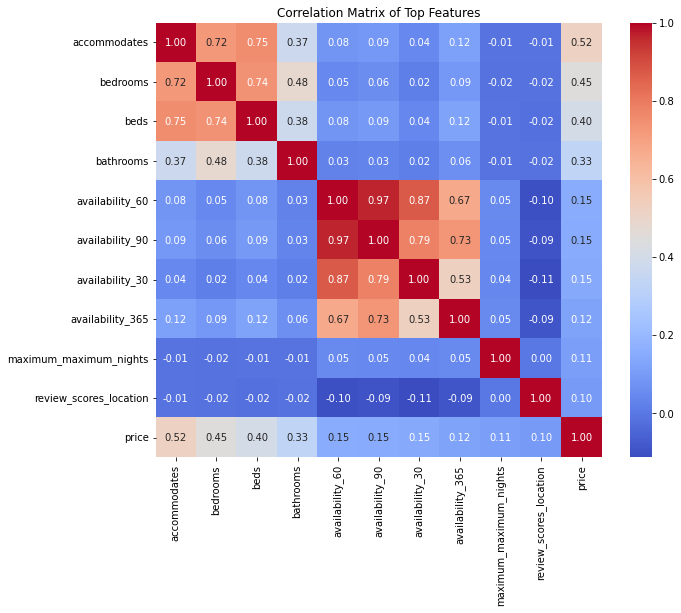

In [21]:
# Select the top N most correlated features (e.g., top 10)
top_features = top_corr_features.index[1:11]  # skip 'price' itself at index 0

# Create a filtered dataframe of just those top features + price
filtered_df = df[top_features.tolist() + ['price']]

# Compute new correlation matrix for this smaller set
filtered_corr = filtered_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top Features")
plt.show()

In [22]:
# Drop non-numeric columns not suitable for modeling
columns_to_drop = ['price', 'name', 'description', 'host_name']
available_cols_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]
X = df_encoded.drop(columns=available_cols_to_drop)

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Fill remaining NaNs with median values
X = X.fillna(X.median(numeric_only=True))

# Define target
y = df_encoded['price'].astype(np.float32)

# Match y to X
y = y.loc[X.index]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Linear Regression MSE:", mse)
print("Linear Regression R²:", r2)

Linear Regression MSE: 4370.371322009512
Linear Regression R²: 0.5204255924507001


In [24]:
# Select only a few useful categorical columns
selected_cat_cols = ['room_type', 'neighbourhood_group_cleansed']

# Reduce cardinality for neighbourhood_group_cleansed
top_neigh = df['neighbourhood_group_cleansed'].value_counts().nlargest(10).index
df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].where(
    df['neighbourhood_group_cleansed'].isin(top_neigh), other='Other'
)

# One-hot encode selected categorical features
df_encoded = pd.get_dummies(df, columns=selected_cat_cols, drop_first=True)

# Check shape
print("Encoded DataFrame shape:", df_encoded.shape)

df_encoded['price'] = stats.mstats.winsorize(df_encoded['price'], limits=[0.05, 0.05])
print("Winsorized Price Summary Statistics:")
print(df_encoded['price'].describe())

Encoded DataFrame shape: (28022, 57)
Winsorized Price Summary Statistics:
count    28022.000000
mean       142.836735
std         95.165879
min         40.000000
25%         70.000000
50%        115.000000
75%        180.000000
max        397.000000
Name: price, dtype: float64


In [93]:
# Initialize scaler and fit on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Train MLP Regressor on scaled data
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate performance
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("MLP Regressor MSE:", mse_mlp)
print("MLP Regressor R²:", r2_mlp)

MLP Regressor MSE: 7685.252404875714
MLP Regressor R²: 0.5859804449007477


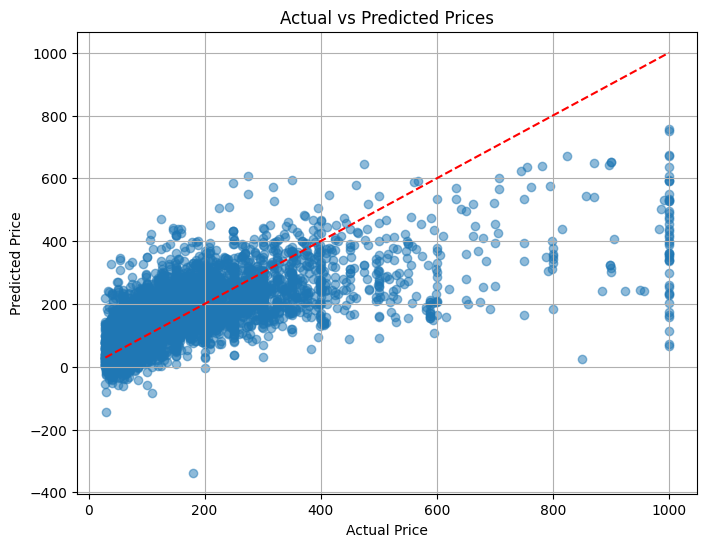

In [95]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

In [96]:
# YOUR CODE HERE
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest MSE:", rf_mse)
print("Random Forest R²:", rf_r2)

Random Forest MSE: 7553.925790051481
Random Forest R²: 0.5930552661008588


In [97]:
gbdt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbdt.fit(X_train, y_train)
gbdt_pred = gbdt.predict(X_test)

gbdt_mse = mean_squared_error(y_test, gbdt_pred)
gbdt_r2 = r2_score(y_test, gbdt_pred)

print("GBDT MSE:", gbdt_mse)
print("GBDT R²:", gbdt_r2)

GBDT MSE: 7919.315334445912
GBDT R²: 0.5733710177979501


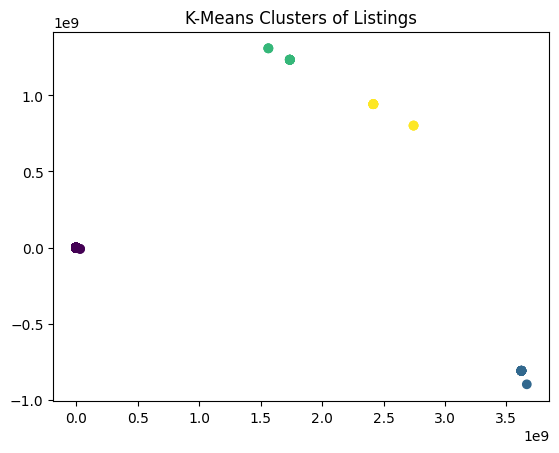

In [98]:
# Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clusters of Listings")
plt.show()

In [99]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Tuned RF MSE:", mean_squared_error(y_test, y_pred_best))
print("Tuned RF R²:", r2_score(y_test, y_pred_best))

Tuned RF MSE: 7512.316830001331
Tuned RF R²: 0.5952968220342953
